### 【問題1】中心点の初期値を決める

In [204]:
import numpy as np
import random

from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=10, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

n_samples = X.shape[0]
n_features = X.shape[1]

#クラス数の入力
K = 3
init_mu_index = random.sample(range(0, n_samples), K)
print("クラスタ数：", K)
print("muの初期値とするサンプルのインデックス:", init_mu_index)
mu = X[init_mu_index]
print("muの初期値:\n", mu)



クラスタ数： 3
muの初期値とするサンプルのインデックス: [4, 9, 3]
muの初期値:
 [[-1.22537652  7.74186809]
 [-2.80339892  3.24469156]
 [ 1.35678894  4.36462484]]


### 【問題2】SSEを求める関数の作成

In [205]:
#クラスタ初期値をランダムで生成
cluster = np.random.randint(0, K, (n_samples, 1))

sum = 0
for num in range(n_samples):
    for k in range(K):
        if cluster[num] == k:
            sum += np.linalg.norm(X[num] - mu[k], ord=2) **2
    

### 【問題3】クラスタへの割り当て

In [206]:
#X -mu[k]のnormが(n_samples, 1)のshapeで出力して欲しいがうまくいかないため、二重forループとした。

#各μと各サンプルのノルムの計算
norm_list = np.zeros((n_samples, K))

for num in range(n_samples):
    for k in range(K):
        norm_list[num, k] = np.linalg.norm(X[num] - mu[k], ord=2)

#print(norm_list)

#各サンプルにクラスタを割り当てる。(最小のノルムとなるμのクラスタとする。)
cluster = np.argmin(norm_list, axis=1).reshape(-1,1)

print(cluster)

[[2]
 [2]
 [2]
 [2]
 [0]
 [1]
 [2]
 [2]
 [0]
 [1]]


### 【問題4】中心点の移動

In [134]:
Xc = np.hstack((X, cluster))

for k in range(K):
    temp = X[(Xc[:,n_features] == k), :]
    mu[k] = np.mean(temp, axis=0)


### 【問題5】繰り返し

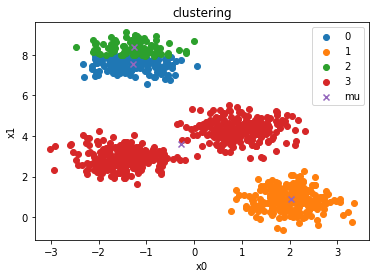

In [84]:
import numpy as np
import random
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#クラスターを割り当てる関数
def set_cluster(X, mu, K):
    
    n_samples = X.shape[0]
    n_features = X.shape[1]
    
    norm_list = np.zeros((n_samples, K))
    for num in range(n_samples):
        for k in range(K):
            norm_list[num, k] = np.linalg.norm(X[num] - mu[k], ord=2)

    cluster = np.argmin(norm_list, axis=1).reshape(-1,1)

    return cluster

#中心点を移動させる関数
def move_mu(X, cluster):
    
    n_samples = X.shape[0]
    n_features = X.shape[1]
    Xc = np.hstack((X, cluster))

    for k in range(K):
        temp = X[(Xc[:,n_features] == k), :]
        mu[k] = np.mean(temp, axis=0)
    
    return mu

#データの生成、μ初期値の設定
X, _ = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
n_samples = X.shape[0]
n_features = X.shape[1]

#クラス数の入力
K = 4
init_mu_index = random.sample(range(0, n_samples), K)
mu = X[init_mu_index]

#クラスタ割り当て、平均値移動を繰り返す
max_iter = 10
for _ in range(max_iter):
    cluster = set_cluster(X, mu, K)
    mu = move_mu(X, cluster)
    

#グラフ描画
Xc = np.hstack((X, cluster))
for i in range(K):
    idx = (Xc[:,n_features] == i)
    plt.scatter(X[idx,0], X[idx,1], label=i)
plt.scatter(mu[:,0], mu[:,1], label='mu', marker='x')


plt.xlabel("x0")
plt.ylabel("x1")
plt.title("clustering")
plt.legend()
plt.show()
    


### 【問題6】異なる初期値で計算

最適化した平均値
 [[ 2.01942692  0.87474842]
 [ 0.92917513  4.29023124]
 [-1.27283855  7.84651464]
 [-1.49807428  2.90164881]]


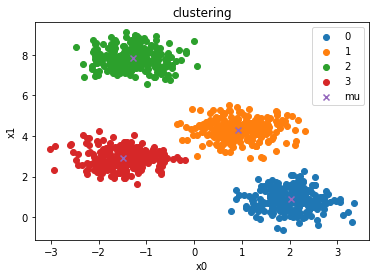

In [64]:
import numpy as np
import random
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#クラスターを割り当てる関数
def set_cluster(X, mu, K):
    
    n_samples = X.shape[0]
    n_features = X.shape[1]
    
    norm_list = np.zeros((n_samples, K))
    for num in range(n_samples):
        for k in range(K):
            norm_list[num, k] = np.linalg.norm(X[num] - mu[k], ord=2)

    cluster = np.argmin(norm_list, axis=1).reshape(-1,1)

    return cluster

#中心点を移動させる関数
def move_mu(X, cluster):
    
    n_samples = X.shape[0]
    n_features = X.shape[1]
    Xc = np.hstack((X, cluster))

    for k in range(K):
        temp = X[(Xc[:,n_features] == k), :]
        mu[k] = np.mean(temp, axis=0)
    
    return mu

#SSEを求める関数
def calc_SSE(X, mu, K, cluster):

    n_samples = X.shape[0]
    sum = 0
    for num in range(n_samples):
        for k in range(K):
            if cluster[num] == k:
                sum += np.linalg.norm(X[num] - mu[k], ord=2) **2

    return sum


#データの生成、μ初期値の設定
X, _ = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
n_samples = X.shape[0]
n_features = X.shape[1]

#クラス数の入力
K = 4

#異なる初期値でループを回す。
n_init = 10
for i in range(n_init):
    init_mu_index = random.sample(range(0, n_samples), K)
    mu = X[init_mu_index]

    max_iter = 10
    for iter in range(max_iter):
        cluster = set_cluster(X, mu, K)
        mu = move_mu(X, cluster)
        SSE = calc_SSE(X, mu, K, cluster)
        
    if  i==0:
        min_SSE = SSE
            
    if SSE < min_SSE:
        min_SSE = SSE
        best_mu = mu
        
    #print("n_init:{}, SSE:{}, best_mu:{}".format(i, SSE, mu))

#最適な平均値の出力
print("最適化した平均値\n", best_mu)
        
#グラフ描画
cluster = set_cluster(X, best_mu, K)
Xc = np.hstack((X, cluster))
for i in range(K):
    idx = (Xc[:,n_features] == i)
    plt.scatter(X[idx,0], X[idx,1], label=i)
plt.scatter(best_mu[:,0], best_mu[:,1], label='mu', marker='x')

plt.xlabel("x0")
plt.ylabel("x1")
plt.title("clustering")
plt.legend()
plt.show()
    

### 【問題7】推定

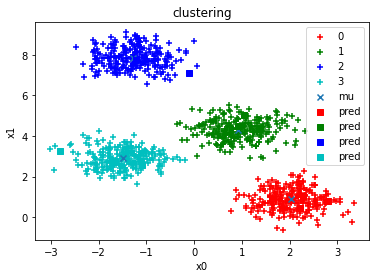

In [73]:
import numpy as np
import random
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#クラスターを割り当てる関数
def set_cluster(X, mu, K):
    
    n_samples = X.shape[0]
    n_features = X.shape[1]
    
    norm_list = np.zeros((n_samples, K))
    for num in range(n_samples):
        for k in range(K):
            norm_list[num, k] = np.linalg.norm(X[num] - mu[k], ord=2)

    cluster = np.argmin(norm_list, axis=1).reshape(-1,1)

    return cluster

#中心点を移動させる関数
def move_mu(X, cluster):
    
    n_samples = X.shape[0]
    n_features = X.shape[1]
    Xc = np.hstack((X, cluster))

    for k in range(K):
        temp = X[(Xc[:,n_features] == k), :]
        mu[k] = np.mean(temp, axis=0)
    
    return mu

#SSEを求める関数
def calc_SSE(X, mu, K, cluster):

    n_samples = X.shape[0]
    sum = 0
    for num in range(n_samples):
        for k in range(K):
            if cluster[num] == k:
                sum += np.linalg.norm(X[num] - mu[k], ord=2) **2

    return sum

#推定する関数
def pred_cluster(X_test, best_mu, K):
    
    n_samples = X_test.shape[0]
    n_features = X_test.shape[1]
    
    norm_list = np.zeros((n_samples, K))
    for num in range(n_samples):
        for k in range(K):
            norm_list[num, k] = np.linalg.norm(X_test[num] - best_mu[k], ord=2)

    pred_cluster = np.argmin(norm_list, axis=1).reshape(-1,1)

    return pred_cluster


#学習データの生成
X, _ = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
n_samples = X.shape[0]
n_features = X.shape[1]

#推定データの生成
X_test, _ = make_blobs(n_samples=10, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

#クラス数の入力
K = 4

#異なる初期値でループを回す。
n_init = 10
for i in range(n_init):
    init_mu_index = random.sample(range(0, n_samples), K)
    mu = X[init_mu_index]

    max_iter = 10
    for iter in range(max_iter):
        cluster = set_cluster(X, mu, K)
        mu = move_mu(X, cluster)
        SSE = calc_SSE(X, mu, K, cluster)
        
    if  i==0:
        min_SSE = SSE
            
    if SSE < min_SSE:
        min_SSE = SSE
        best_mu = mu
        
    #print("n_init:{}, SSE:{}, best_mu:{}".format(i, SSE, mu))

#最適なクラスタリングの出力
#print("最適化した平均値\n", best_mu)
cluster = set_cluster(X, best_mu, K)

#推定
y_pred = pred_cluster(X_test, best_mu, K)
        
#グラフ描画
Xc = np.hstack((X, cluster))

color_list = ["r", "g", "b", "c", "m", "y", "k", "w"]
for i in range(K):
    idx = (Xc[:,n_features] == i)
    plt.scatter(X[idx,0], X[idx,1], label=i, color=color_list[i], marker = '+')
plt.scatter(best_mu[:,0], best_mu[:,1], label='mu', marker='x')

#テストデータの描画

Xc_test = np.hstack((X_test, y_pred))

for i in range(K):
    idx = (Xc_test[:,n_features] == i)
    plt.scatter(X_test[idx,0], X_test[idx,1], label='pred', color=color_list[i], marker='s' )

plt.xlabel("x0")
plt.ylabel("x1")
plt.title("clustering")
plt.legend()
plt.show()
    

### 【問題8】エルボー法の実装

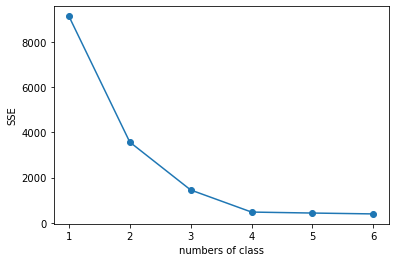

In [91]:
import numpy as np
import random
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#クラスターを割り当てる関数
def set_cluster(X, mu, K):
    
    n_samples = X.shape[0]
    n_features = X.shape[1]
    
    norm_list = np.zeros((n_samples, K))
    for num in range(n_samples):
        for k in range(K):
            norm_list[num, k] = np.linalg.norm(X[num] - mu[k], ord=2)

    cluster = np.argmin(norm_list, axis=1).reshape(-1,1)

    return cluster

#中心点を移動させる関数
def move_mu(X, cluster):
    
    n_samples = X.shape[0]
    n_features = X.shape[1]
    Xc = np.hstack((X, cluster))

    for k in range(K):
        temp = X[(Xc[:,n_features] == k), :]
        mu[k] = np.mean(temp, axis=0)
    
    return mu

#SSEを求める関数
def calc_SSE(X, mu, K, cluster):

    n_samples = X.shape[0]
    sum = 0
    for num in range(n_samples):
        for k in range(K):
            if cluster[num] == k:
                sum += np.linalg.norm(X[num] - mu[k], ord=2) **2

    return sum

#推定する関数
def pred_cluster(X_test, best_mu, K):
    
    n_samples = X_test.shape[0]
    n_features = X_test.shape[1]
    
    norm_list = np.zeros((n_samples, K))
    for num in range(n_samples):
        for k in range(K):
            norm_list[num, k] = np.linalg.norm(X_test[num] - best_mu[k], ord=2)

    pred_cluster = np.argmin(norm_list, axis=1).reshape(-1,1)

    return pred_cluster


#学習データの生成
X, _ = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
n_samples = X.shape[0]
n_features = X.shape[1]

#推定データの生成
X_test, _ = make_blobs(n_samples=10, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

#異なるクラス数でループを回す
max_K = 6

best_SSE_list = []
for K in range(1,max_K+1):

    #異なる初期値でループを回す。
    n_init = 10
    for i in range(n_init):
        init_mu_index = random.sample(range(0, n_samples), K)
        mu = X[init_mu_index]

        #クラスタ割当、平均値移動の繰り返し回数
        max_iter = 10
        for iter in range(max_iter):
            cluster = set_cluster(X, mu, K)
            mu = move_mu(X, cluster)
            SSE = calc_SSE(X, mu, K, cluster)

        #print("K:{}, n_init:{}, SSE:{}".format(K,n_init,SSE))
        if  i==0:
            min_SSE = SSE
            
        if SSE < min_SSE:
            min_SSE = SSE
            best_mu = mu

    best_SSE_list.append(min_SSE)

#グラフ描画
x_axis = range(1,max_K+1)
plt.plot(x_axis, best_SSE_list, marker='o')
plt.xlabel("numbers of class")
plt.ylabel("SSE")
plt.show()
    

### Diverの雛形にあわせてコーディングし直す

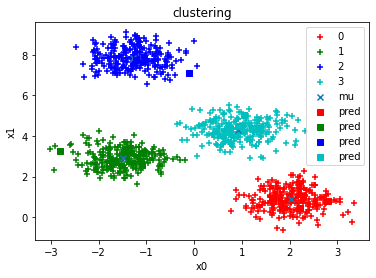

In [171]:
import numpy as np
import random
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

class ScratchKMeans():

    def __init__(self, n_clusters, n_init=10, max_iter=5, tol=1, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.best_mu = np.array([])
        self.best_cluster = np.array([])
        
    def fit(self, X):

        n_samples = X_test.shape[0]
        n_features = X_test.shape[1]
        
        #クラス数のは'K'という変数に保管することにする。
        #print(self.n_clusters)
        K = self.n_clusters

        #異なる初期値でループを回す。
        for i in range(self.n_init):
            init_mu_index = random.sample(range(0, n_samples), K)
            mu = X[init_mu_index]

            #最適化のため指定回数分のループを回す(クラスタ割当、平均値移動の繰り返し)
            for _ in range(self.max_iter):
                cluster = self._set_cluster(X, mu)
                mu = self._move_mu(X, cluster)
                SSE = self._calc_SSE(X, mu, cluster)
            #print("K:{}, mu:{}, SSE:{}".format(K,mu,SSE))
            #print(mu.shape)
        
            #異なる初期値で最も低いSSEとなる中心値(best_mu)を探す
            if  i==0:
                min_SSE = SSE
            
            if SSE <= min_SSE:
                min_SSE = SSE
                best_mu = mu
                #print("K:{}, mu:{}, SSE:{}".format(K,mu,SSE))
        
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print()
                
        #分類したクラスタと最適化された平均値を返ることにする。 
        self.best_mu = best_mu
        self.best_cluster = self._set_cluster(X, best_mu)
        return self.best_cluster, self.best_mu, min_SSE

    #推定メソッド
    def predict(self, X_test):

        K = self.n_clusters
        n_samples = X_test.shape[0]
        n_features = X_test.shape[1]

        norm_list = np.zeros((n_samples, K))
        for num in range(n_samples):
            for k in range(K):
                norm_list[num, k] = np.linalg.norm(X_test[num] - self.best_mu[k], ord=2)

        pred_cluster = np.argmin(norm_list, axis=1).reshape(-1,1)
        
        return pred_cluster
    
    #クラスターを割り当てるメソッド
    def _set_cluster(self, X, mu):
    
        K = self.n_clusters
        n_samples = X.shape[0]
        n_features = X.shape[1]
    
        norm_list = np.zeros((n_samples, K))
        for num in range(n_samples):
            for k in range(K):
                norm_list[num, k] = np.linalg.norm(X[num] - mu[k], ord=2)

        cluster = np.argmin(norm_list, axis=1).reshape(-1,1)

        return cluster

    #中心点を移動させるメソッド
    def _move_mu(self, X, cluster):

        K = self.n_clusters
       # print(K)
        n_samples = X.shape[0]
        n_features = X.shape[1]
        Xc = np.hstack((X, cluster))

        mu_temp = np.zeros((K,n_features))
        for k in range(K):
            temp = X[(Xc[:,n_features] == k), :]
            #print(temp.shape)
            mu_temp[k] = np.mean(temp, axis=0)
            
        #print(mu_temp.shape)
    
        return mu_temp

    #SSEを求めるメソッド
    def _calc_SSE(self, X, mu, cluster):

        K = self.n_clusters
        n_samples = X.shape[0]
        sum = 0
        for num in range(n_samples):
            for k in range(K):
                if cluster[num] == k:
                    sum += np.linalg.norm(X[num] - mu[k], ord=2) **2

        return sum

#学習データの生成
X, _ = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
n_samples = X.shape[0]
n_features = X.shape[1]

#推定データの生成
X_test, _ = make_blobs(n_samples=10, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

#機械学習(fit)
K=4
means = ScratchKMeans(K)
cluster, best_mu, _ = means.fit(X)

#推定
y_pred = means.predict(X_test)
        
#グラフ描画
Xc = np.hstack((X, cluster))
color_list = ["r", "g", "b", "c", "m", "y", "k", "w"]
for i in range(K):
    idx = (Xc[:,n_features] == i)
    plt.scatter(X[idx,0], X[idx,1], label=i, color=color_list[i], marker = '+')
plt.scatter(best_mu[:,0], best_mu[:,1], label='mu', marker='x')

#テストデータの描画
Xc_test = np.hstack((X_test, y_pred))
for i in range(K):
    idx = (Xc_test[:,n_features] == i)
    plt.scatter(X_test[idx,0], X_test[idx,1], label='pred', color=color_list[i], marker='s' )

plt.xlabel("x0")
plt.ylabel("x1")
plt.title("clustering")
plt.legend()
plt.show()


### 【問題10】クラスタ数kの選択
### 【問題11】既知のグループとの比較

In [177]:
import pandas as pd
#csvファイルの読込
df = pd.read_csv("Wholesale customers data.csv")

#channel, regionデータを削除する。
df_drop = df.drop(columns=['Channel', 'Region'])
df_drop.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


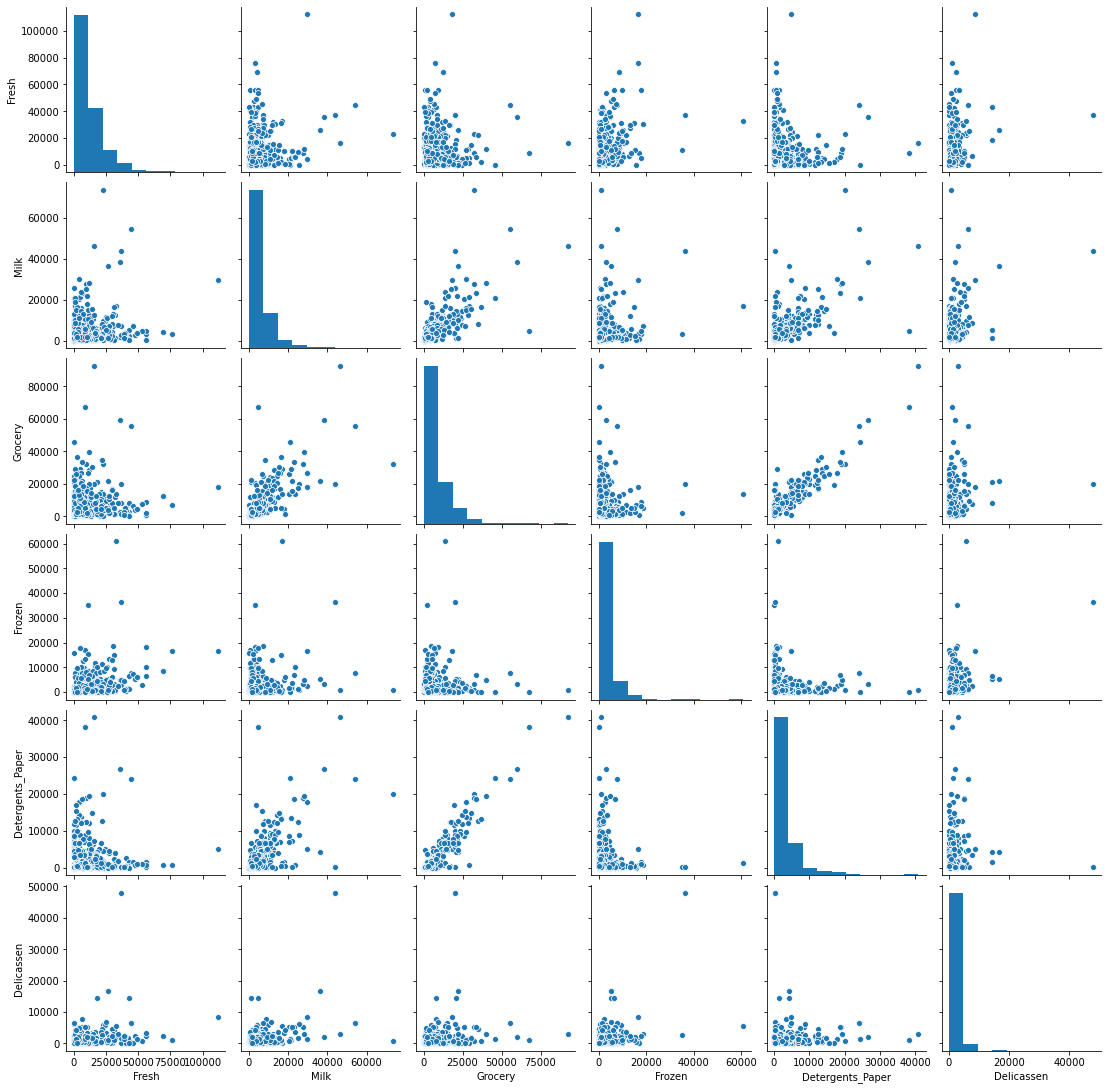

In [178]:
#データの分布等を確認する。
import seaborn as sns
pair = sns.pairplot(df_drop)

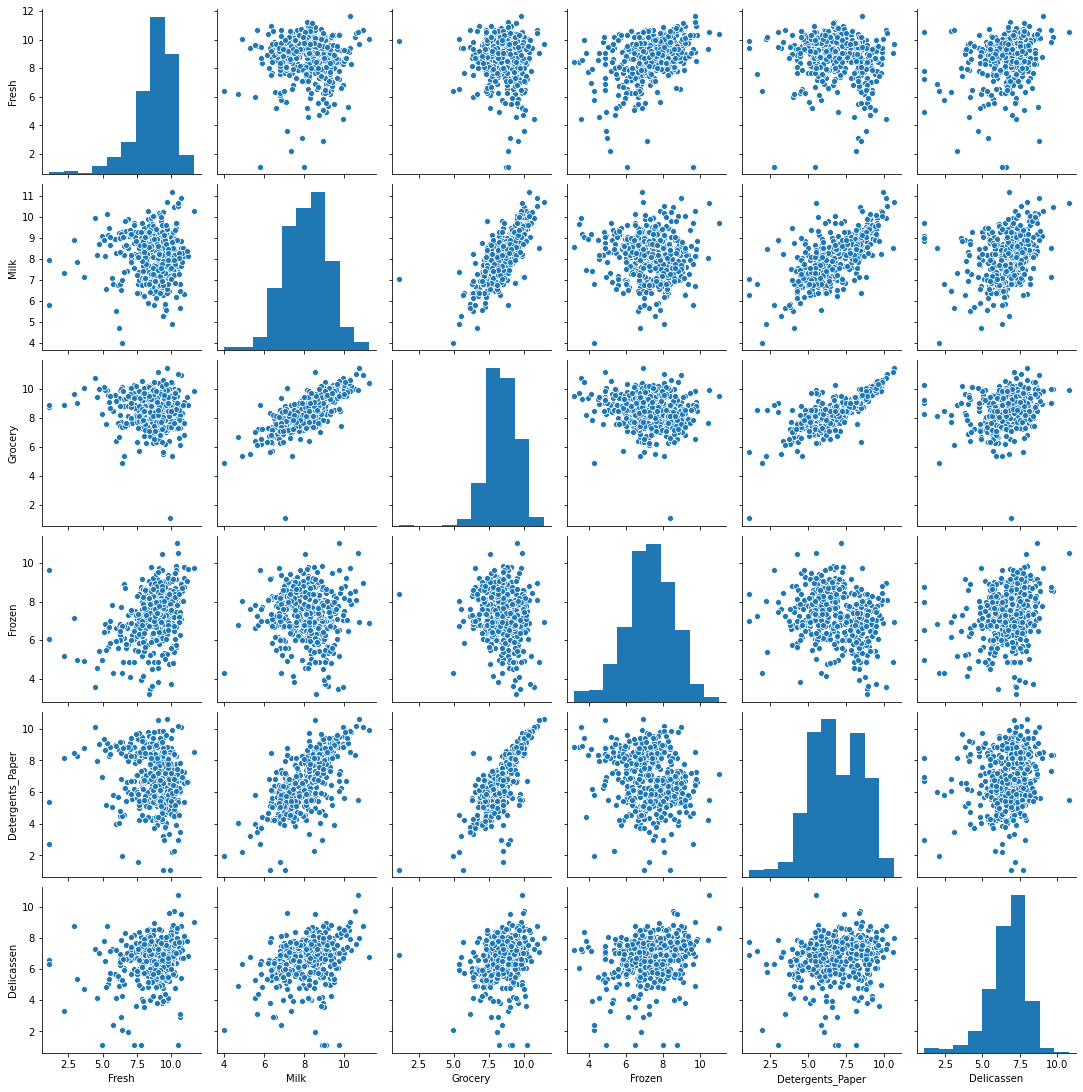

In [181]:
#データを対数変換する。（分布が左に偏っているため）
df_log_drop = df_drop.apply(np.log)
log_pair = sns.pairplot(df_log_drop)

In [182]:
#次元削減
from sklearn.decomposition import PCA

data = df_log_drop

pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)


### 【問題10】クラスタ数kの選択

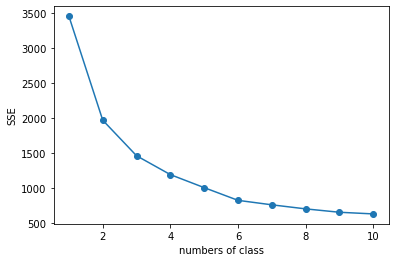

In [187]:
#クラスタ数kの適切な数を検討するためエルボー分析を行う。
X = data_pca

K = 10 #検討するクラスタ数の上限
SSE_list = []
for k in range(1,K+1):
    means = ScratchKMeans(k)
    cluster, best_mu, SSE = means.fit(data_pca)
    SSE_list.append(SSE)

#グラフ描画
x_axis = range(1, K+1)
plt.plot(x_axis, SSE_list, marker='o')
plt.xlabel("numbers of class")
plt.ylabel("SSE")
plt.show()

目視ではあるが、クラスタ数：６からはSSEの減少が緩やかだと考える。
クラスタ数は６個と設定する。

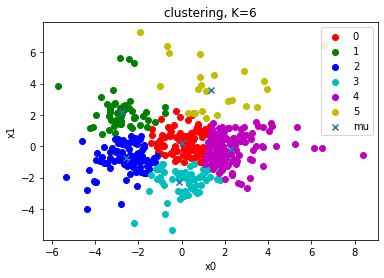

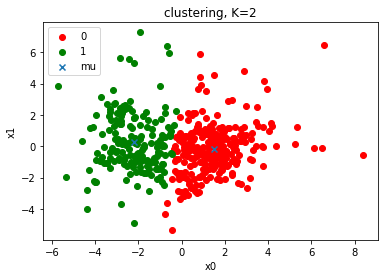

In [201]:
#上記で決定したクラスタ数kにてグラフの描画を行う。
X = data_pca

K = 6 #検討するクラスタ数の上限
means = ScratchKMeans(K)
cluster, best_mu, SSE = means.fit(data_pca)

#グラフ描画
Xc = np.hstack((X, cluster))
color_list = ["r", "g", "b", "c", "m", "y", "k", "w"]
for i in range(K):
    idx = (Xc[:,n_features] == i)
    plt.scatter(X[idx,0], X[idx,1], label=i, color=color_list[i], marker = 'o')
plt.scatter(best_mu[:,0], best_mu[:,1], label='mu', marker='x')

plt.xlabel("x0")
plt.ylabel("x1")
plt.title("clustering, K=6")
plt.legend()
plt.show()

#元データのchannnelの分類と比較するため、K=2でも描画してみる。

K = 2 #検討するクラスタ数の上限
means = ScratchKMeans(K)
cluster, best_mu, SSE = means.fit(data_pca)

#グラフ描画
Xc = np.hstack((X, cluster))
color_list = ["r", "g", "b", "c", "m", "y", "k", "w"]
for i in range(K):
    idx = (Xc[:,n_features] == i)
    plt.scatter(X[idx,0], X[idx,1], label=i, color=color_list[i], marker = 'o')
plt.scatter(best_mu[:,0], best_mu[:,1], label='mu', marker='x')

plt.xlabel("x0")
plt.ylabel("x1")
plt.title("clustering, K=2")
plt.legend()
plt.show()


### 【問題11】既知のグループとの比較

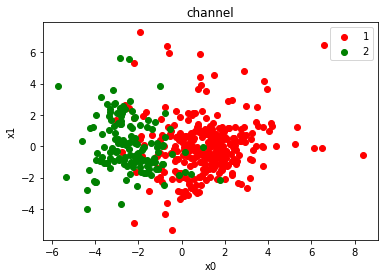

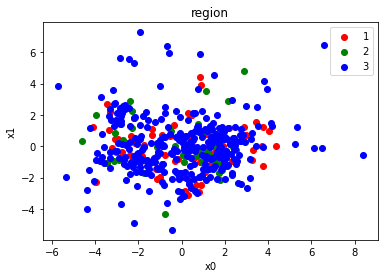

In [199]:
X = data_pca
X_array = df.values
channel = X_array[:,0].reshape(-1,1) #1,2
region = X_array[:,1].reshape(-1,1)   #1, 2, 3


#グラフ描画
color_list = ["r", "g", "b", "c", "m", "y", "k", "w"]

#channelによるグループ毎の描画
X_ch = np.hstack((X, channel))
K = len(np.unique(channel))
for i in range(1, K+1):
    idx = (X_ch[:,n_features] == i)
    plt.scatter(X[idx,0], X[idx,1], label=i, color=color_list[i-1], marker = 'o')
plt.xlabel("x0")
plt.ylabel("x1")
plt.title("channel")
plt.legend()
plt.show()

#regionによるグループ毎の描画
X_re = np.hstack((X, region))
K = len(np.unique(region))
for i in range(1, K+1):
    idx = (X_re[:,n_features] == i)
    plt.scatter(X[idx,0], X[idx,1], label=i, color=color_list[i-1], marker = 'o')
plt.xlabel("x0")
plt.ylabel("x1")
plt.title("region")
plt.legend()
plt.show()


### 【問題12】卸売業者にとって有益な情報

①K-meanによるクラスタ分析の結果と、元データのchannelによる分類は

　似た分類結果となった。channelによる分類は統計的に意味があると
  
  　裏付けできた。
    
②元データのregionによる分類から、統計上に有意な情報を得ることは難しい。

　regionによる分類に今後は力を入れなくてもよいと考える。
    
  
　　　　